# Linear Regression | Pipeline | Save and Load a trained Model | Model Evaluation
Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

## 1. Simple Linear Regression
Simple linear regression is an approach for predicting a response using a single feature. It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value($y$) as accurately as possible as a function of the feature or independent variable($x$).
The linear function can be represented as:

$$
y = mx + c
$$
Where:
- y is the dependent variable (response)
- x is the independent variable (feature)
- m is the slope of the line (coefficient)
- c is the y-intercept (constant term)

The model is trained on a dataset with features($x$) and target($y$). It learns the values of coefficients $m$ and $c$ that minimize the difference between actual values in the dataset and predicted values by the model. The difference between actual values and predicted values is known as the cost function. The model optimizes the cost function using the gradient descent algorithm.

## 2. Multiple Linear Regression
Multiple linear regression is an extension of simple linear regression that uses multiple features to predict the response variable. The linear function can be represented as:
$$
y = m_1x_1 + m_2x_2 + ... + m_nx_n + c 
$$
Where:
- $y$ is the dependent variable (response)
- $x_1$, $x_2$, ..., $x_n$ are the independent variables (features)
- $c$ is the $y$-intercept (constant term)
- $m_1$, $m_2$, ..., $m_n$ are the coefficients for each feature

The model is trained on a dataset with features($x$) and target($y$). It learns the values of coefficients $m_1$, $m_2$, $m_3$, ... and $c$ that minimize the difference between actual values in the dataset and predicted values by the model. The difference between actual values and predicted values is known as the cost function. The model optimizes the cost function using the gradient descent algorithm.




# 1. Simple Linear Regression

In [46]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

In [47]:
# import the data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


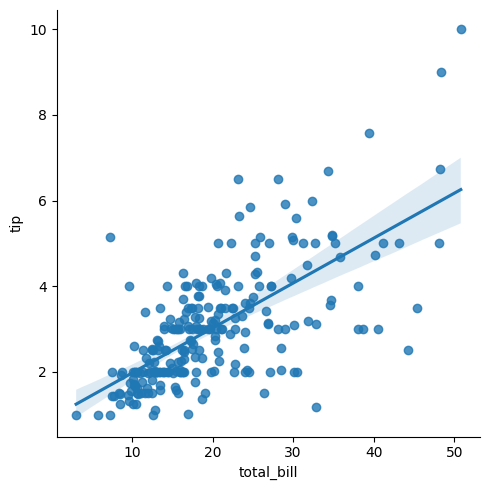

In [48]:
sns.lmplot(x='total_bill', y='tip', data=df)

#'lmplot' is used to create a linear regression plot between two variables (total_bill and tip). lm here stands for linear model

In [49]:
# preprocess the data
scalar = StandardScaler()
# The above line will create a StandardScaler object called 'scalar'. This object is used to scale the data.
scalar


,copy,True
,with_mean,True
,with_std,True


In [50]:
df[['total_bill', 'tip']] = scalar.fit_transform(df[['total_bill', 'tip']])

# The above line will scale the 'total_bill' and 'tip' columns of the 'df' dataframe using the 'fit_transform' method of the 'scalar' object. 
# This will scale the data such that it has a mean of 0 and a standard deviation of 1.
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,Female,No,Sun,Dinner,2
1,-1.063235,-0.969205,Male,No,Sun,Dinner,3
2,0.137780,0.363356,Male,No,Sun,Dinner,3
3,0.438315,0.225754,Male,No,Sun,Dinner,2
4,0.540745,0.443020,Female,No,Sun,Dinner,4


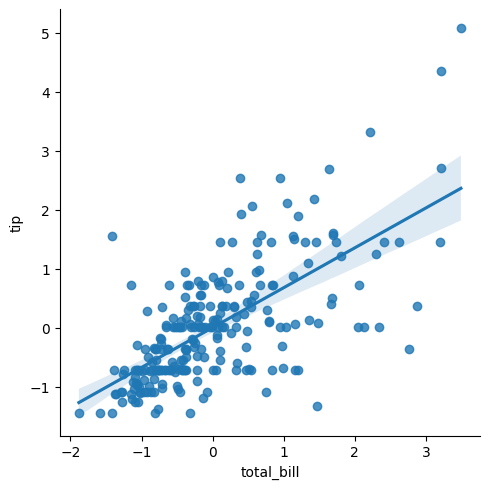

In [51]:
sns.lmplot(x='total_bill', y='tip', data=df)

# This will create a linear regression plot between the scaled 'total_bill' and scaled 'tip' columns

In [52]:
# separate the features X and the target/labels y
X = df[['total_bill']]
y = df['tip']

In [53]:
X, y

(     total_bill
 0     -0.314711
 1     -1.063235
 2      0.137780
 3      0.438315
 4      0.540745
 ..          ...
 239    1.040511
 240    0.832275
 241    0.324630
 242   -0.221287
 243   -0.113229
 
 [244 rows x 1 columns],
 0     -1.439947
 1     -0.969205
 2      0.363356
 3      0.225754
 4      0.443020
          ...   
 239    2.115963
 240   -0.722971
 241   -0.722971
 242   -0.904026
 243    0.001247
 Name: tip, Length: 244, dtype: float64)

In [54]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# The above line will split the data into training and testing sets.

#NOW WE WILL CALL THE MODEL
model = LinearRegression()

#NOW WE WILL FIT THE MODEL
model.fit(X_train, y_train)

#NOW WE WILL PREDICT THE MODEL
model.predict([[15]])           # We used two brackets because predict method expects it to be a 2D array




/opt/anaconda3/envs/python_ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.35454829])

In [55]:
# Prediction

y_pred = model.predict(X_test)      # This line will predict the target values for the test set
y_pred

array([ 0.03402197, -0.82196658,  0.40043156,  0.50423469, -0.49428952,
       -0.11548553,  0.70177051, -0.53457133, -0.35640177, -0.30992275,
       -0.08449952, -0.66703653, -0.67633233, -0.37964127, -0.72126205,
       -0.05738676, -0.05196421,  0.17036042, -0.22703517,  1.68944962,
        0.10141655,  0.09831795, -0.39281033, -0.76154386,  0.1176842 ,
       -0.5957687 , -0.70576904,  0.45698103, -0.22393657,  2.23015551,
        1.44775873, -0.90175556, -0.12168273,  0.07043054, -0.18675336,
        0.36402299, -0.56943059,  1.83818247, -0.48189511,  0.2547973 ,
       -0.68717744, -0.37654267,  0.35395254, -0.70112114, -0.70034649,
       -1.26351724, -0.68098023, -0.05351351, -0.91569927])

In [56]:
# NOW WE WILL EVALUATE THE MODEL WITH DIFFERENT METRICS

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
# root mean squared error
print('Root Mean Squared Error/RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  0.29833825307855666
R2 Score:  0.5449381659234668
Mean Absolute Percentage Error:  7.369211703304973
Mean Absolute Error:  0.4496364577054319
Root Mean Squared Error/RMSE:  0.5462034905404365


## *Save and Load a trained Machine Learning Model*
After training a machine learning model, it is important to save the model to a file. This is because training a machine learning model can be computationally expensive and time-consuming. Saving the model to a file allows us to use the trained model in the future without having to retrain it. In this notebook, we will see how to save and load a trained machine learning model using the `pickle` library in Python.


In [ ]:
# save the model
import pickle 
# create folder to save the model if exists remove it
import os
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')
# save the model
pickle.dump(model, open('./saved_models/01_linear_regression.pkl', 'wb'))

In [59]:
# load the model
import pickle
model_load = pickle.load(open('./saved_models/01_linear_regression.pkl', 'rb'))
model_load.predict([[10.5]])

/opt/anaconda3/envs/python_ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.25759892])

# 2. Multiple Linear Regression
Multi-linear regression is a type of regression analysis that is used to predict the relationship between two or more `independent variables` and one `dependent variable`. In this notebook, we will use the `sklearn` library to create a multi-linear regression model and save it to a file. We will then load the model from the file and use it to make predictions.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')


# load the data
df = sns.load_dataset('tips')
df.head()

X = df[['total_bill', 'size', 'day']]
y = df['tip']

# preprocess the data
scalar = StandardScaler()
X[['total_bill', 'size']] = scalar.fit_transform(X[['total_bill', 'size']])
le = LabelEncoder()
X['day'] = le.fit_transform(X['day'])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# call the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# metric to evaluate the model
y_pred = model.predict(X_test)


print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")



Mean Squared Error: 0.6566031847646814
R2 Score: 0.4747054104497256
Mean Absolute Error: 0.6656656656006285
Mean Absolute Percentage Error: 0.2789919978935491
Root Mean Squared Error: 0.810310548348398


## 2.1. Using Pipeline
In this notebook, we will use the `Pipeline` class from the `sklearn` library to create a multi-linear regression model. The `Pipeline` class allows us to chain multiple estimators into a single estimator. This makes it easier to work with multiple steps in a machine learning workflow.

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('tips')
# separate the features X and the target/labels y
X = df[['total_bill', 'size', 'day']]
y = df['tip']

# NOW WE START WITH PIPELINE
# numerical features
numeric_features = ['total_bill', 'size']
# categorical features
categorical_features = ['day']

# define the pipeline
preprocessor = ColumnTransformer(           # This line will define the preprocessor for the pipeline 
    transformers=[                          # This line will define the transformers for the preprocessor
        ('num', StandardScaler(), numeric_features),        # This line will define the first transformer, which will apply StandardScaler to the numeric features
        ('cat', OneHotEncoder(), categorical_features)      # This line will define the second transformer, which will apply OneHotEncoder to the categorical features
    ]
)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Pipeline with preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Mean Squared Error: 0.6655725405795039
R2 Score: 0.4675297613048527
Mean Absolute Error: 0.6591957722968484
Mean Absolute Percentage Error: 0.27306221352591653
Root Mean Squared Error: 0.8158262931405826


In [64]:
# To get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Go for Big Data
We will use diamonds dataset from seaborn library. The dataset contains the following columns:

- `carat`: weight of the diamond (0.2--5.01)
- `cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color`: diamond colour, from J (worst) to D (best)
- `clarity`: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- `depth`: total depth percentage = $\frac{z}{\text{mean}(x, y)}$ = $\frac{2 \times z}{x + y}$ (43--79)
- `table`: width of top of diamond relative to widest point (43 -- 95)
- `price`: price in US dollars (18,823)
- `x`: length in mm (0--10.74)
- `y`: width in mm (0--58.9)
- `z`: depth in mm (0--31.8)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
#data pre processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
#ignore warning
import warnings
warnings.filterwarnings('ignore')

# load the data
df = sns.load_dataset('diamonds')

# separate the features X and the target/labels y
X = df.drop('price', axis=1)
y = df['price']


# INTRODUCE THE PIPELINE

# numerical features
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
# categorical features
categorical_features = ['cut', 'color', 'clarity']


# define the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

#pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# fit the model
pipeline.fit(X_train, y_train)

# metric to evaluate the model
y_pred = pipeline.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}")
# root mean squared error
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")



Mean Squared Error: 1288705.477851676
R2 Score: 0.9189331350419386
Mean Absolute Error: 737.1513665933285
Mean Absolute Percentage Error: 0.39529335164943635
Root Mean Squared Error: 1135.2116445190632


In [67]:
df['price'].describe()      # This line will describe the price column of the dataframe


count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

### Interpretation of Model Metrics above:
The Metrics indicate the performance of the regression model:

Here are the interpretations of each metric:

- **Mean Squared Error (MSE)**: This metric shows that the average of the squared differences between the predicted and actual values is approximately 1,254,303.56. MSE gives more weight to larger errors due to squaring, so it is sensitive to outliers.

- **R2 Score**: This metric measures the proportion of variance in the target variable that is explained by the model. A higher R2 score indicates better model performance

- **Root Mean Squared Error (RMSE)**: This metric is the square root of MSE and provides an error value in the same units as the target variable. An RMSE of approximately 1,120.91 indicates that the model's predictions deviate from the actual values by this amount on average. Like MSE, lower RMSE values indicate better model performance.

- **Mean Absolute Error (MAE)**: This metric indicates that, on average, the model's predictions are off by approximately 807.22 units of the target variable (price). A lower MAE value indicates better model performance.

- **Mean Absolute Percentage Error (MAPE)**: This metric measures the average percentage difference between the predicted and actual values. A lower MAPE value indicates better model performance.

- **Root Mean Squared Error (RMSE)**: This metric is the square root of MSE and provides an error value in the same units as the target variable. An RMSE of approximately 1,120.91 indicates that the model's predictions deviate from the actual values by this amount on average. Like MSE, lower RMSE values indicate better model performance.



Overall, the R2 score of 0.9189 suggests that the model explains a significant portion of the variance in the target variable, indicating good predictive performance. However, the MSE, RMSE, MAE, and MAPE values are relatively high, indicating that there is still room for improvement in reducing prediction errors.



### Conclusion
In this notebook, we created a multi-linear regression model using the `sklearn` library and saved it to a file. We then loaded the model from the file and used it to make predictions. We also evaluated the model's performance using various metrics such as MSE, R2 score, MAE, MAPE, and RMSE. The results indicate that the model explains a significant portion of the variance in the data but has room for improvement in terms of accuracy.


### **15 Ways to import the ML Model's performance**
1. **Feature Engineering**: Create new features that capture additional information from the data.
2. **Hyperparameter Tuning**: Optimize the model's hyperparameters to improve performance.
3. **Regularization**: Apply regularization techniques to prevent overfitting.
4. **Ensemble Methods**: Use ensemble methods such as Random Forest or Gradient Boosting to improve predictive performance.
5. **Cross-Validation**: Use cross-validation to assess the model's performance more accurately.
6. **Feature Selection**: Identify and select the most relevant features for the model.
7. **Data Preprocessing**: Clean and preprocess the data to improve model performance.
8. **Model Selection**: Experiment with different regression models to find the best fit for the data.
9. **Error Analysis**: Analyze the model's errors to identify patterns and areas for improvement.
10. **Domain Knowledge**: Incorporate domain knowledge to improve the model's predictive power.
11. **Data Augmentation**: Increase the size of the training data through data augmentation techniques.
12. **Model Stacking**: Combine multiple models to improve predictive performance.
13. **Model Interpretation**: Interpret the model's predictions to gain insights into the data and improve performance.
14. **Model Deployment**: Deploy the model in a production environment and monitor its performance over time.
15. **Feedback Loop**: Incorporate feedback from users and stakeholders to continuously improve the model.

